## Autonomous drone to identify iris

- We want to make a autonomous drone which is going to identify iris species.
- It is going to measure the length and width of the sepals and petals.
- Use the Iris dataset to design a simple machine learning model.



In [15]:
import numpy as np
from collections import Counter
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


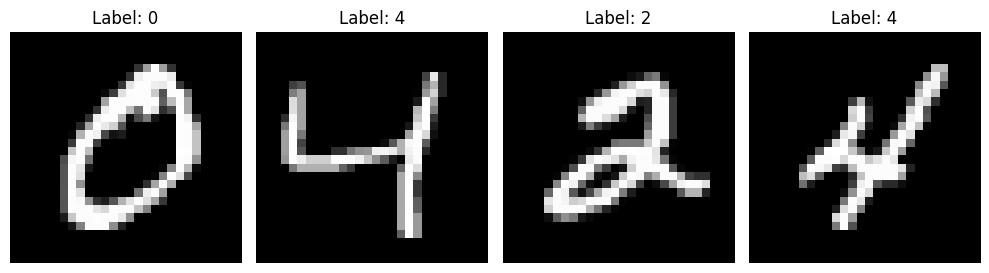

In [16]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### x % 2 == 0
indices = np.where(y_train % 2 == 0)
X_train = X_train[indices]
y_train = y_train[indices]

X_train = X_train[0:6300]
y_train = y_train[0:6300]

indices = np.where(y_test % 2 == 0)
X_test = X_test[indices]
y_test = y_test[indices]

X_test = X_test[0:700]
y_test = y_test[0:700]

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

X_train = X_train.reshape(len(X_train), len(X_train[0])*len(X_train[0]))
X_test = X_test.reshape(len(X_test), len(X_test[0])*len(X_test[0]))

### Prepare the data

In [17]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (6300, 784)
X_test shape : (700, 784)
y_train shape : (6300,)
y_test shape : (700,)


## data preparation is complete (on to algorithms)

In [18]:
class My_KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for i in range(X_test.shape[0]):
            predictions.append(self._knn_classifier(X_test[i]))
        return predictions
    def _knn_classifier(self, X_test):
        distances, targets = [], []
        for i in range(self.X_train.shape[0]):
            distance = np.linalg.norm(self.X_train[i]-X_test)
            distances.append([distance, i])
        distances = sorted(distances)
        for i in range(self.k):
            index = distances[i][1]
            targets.append(self.y_train[index])
        return max(targets, key=targets.count)

model = My_KNNClassifier(k=84)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))

0.6242857142857143


              precision    recall  f1-score   support

           0       0.99      0.68      0.81       120
           2       0.91      0.59      0.72       165
           4       0.43      0.98      0.60       160
           6       0.67      0.73      0.70       122
           8       0.92      0.08      0.15       133

    accuracy                           0.62       700
   macro avg       0.78      0.61      0.59       700
weighted avg       0.77      0.62      0.60       700



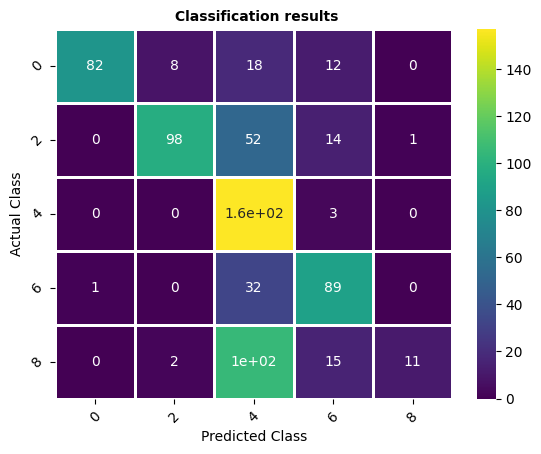

In [19]:

cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels([0,2,4,6,8]);
ax.set_yticklabels([0,2,4,6,8]);

plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(y_test, model.predict(X_test)))

### remember we had a balanced dataset, if the dataset was imbalanced we will have to carefully choose a suitable metric.

### let's see how sklearn performs

preds: [2 0 4 4 0 6 0 4 6 6 4 0 4 0 4 2 2 4 2 2 4 4 6 6 0 4 8 4 6 4 0 0 2 2 6 2 8
 4 6 6 4 6 6 0 4 2 4 8 4 4 4 2 4 6 0 8 6 6 8 0 6 4 6 8 2 0 2 6 0 4 4 6 4 6
 4 4 4 2 2 8 8 8 0 8 2 0 0 0 6 4 2 6 2 4 0 6 2 2 2 8 4 8 8 2 2 4 8 2 0 6 4
 2 4 2 6 2 6 8 8 8 0 0 4 8 2 2 2 6 4 8 2 2 0 4 0 0 2 8 4 2 4 0 2 4 0 0 6 0
 2 0 4 6 0 2 8 6 4 8 0 6 8 4 6 2 2 0 6 6 2 0 8 8 4 4 0 6 6 2 2 8 6 2 4 4 2
 8 8 2 4 0 2 4 2 2 0 4 4 8 8 4 8 8 6 0 0 0 2 0 6 4 2 2 6 8 0 6 6 6 8 8 2 8
 6 8 4 2 4 0 8 0 8 0 4 0 6 2 6 4 2 2 6 2 6 4 8 0 8 4 4 6 4 2 8 2 4 8 8 4 0
 0 2 2 0 8 4 4 6 0 8 0 4 6 0 6 4 8 8 0 8 2 0 6 4 8 0 6 8 0 6 8 6 8 8 6 0 2
 4 0 2 8 0 8 4 6 2 6 2 8 2 2 2 8 0 2 0 6 6 2 8 0 8 4 0 8 6 4 4 6 8 6 2 8 8
 4 4 0 0 4 4 8 4 0 8 2 0 8 4 0 4 0 6 2 6 2 6 4 6 2 4 2 0 6 2 4 0 4 4 4 8 4
 0 2 4 6 4 4 2 4 8 4 6 8 4 8 0 2 2 8 4 4 0 8 8 6 2 6 6 0 2 4 2 8 2 6 2 4 8
 4 2 0 0 0 2 6 6 2 8 2 2 6 0 8 2 2 8 2 8 8 4 0 6 6 2 2 2 0 0 8 4 4 6 0 2 4
 4 8 8 4 2 2 2 2 0 4 0 6 6 2 6 6 6 2 8 6 4 4 8 0 4 4 4 0 6 2 2 2 0 8 2 6 6
 2 0 2 2 0 8 0 2 8

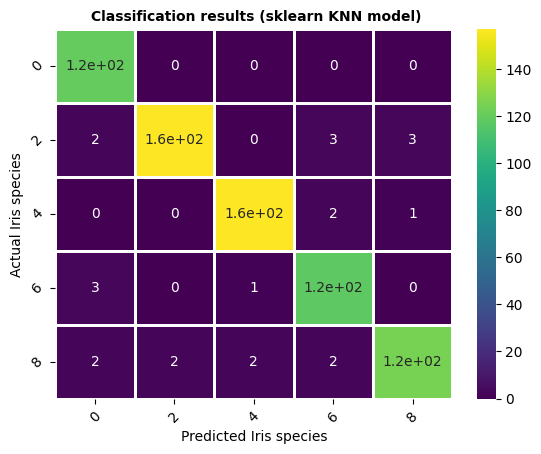

In [20]:
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)

skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels([0,2,4,6,8]);
ax.set_yticklabels([0,2,4,6,8]);
plt.xlabel('Predicted Iris species');
plt.ylabel('Actual Iris species');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))

# **The correct number of 6's that were identified by the model were 89**